# Fast Analysis

The aim is to compare several experiments, more easily and quickly.

# Importations

In [1]:
import numpy as np
from scipy.io import loadmat, savemat
from scipy.optimize import curve_fit, minimize, least_squares
from scipy.integrate import trapz
from tqdm import tqdm
from scipy.signal import savgol_filter
from scipy.optimize import fsolve

In [2]:
from StochasticForceInference.StochasticForceInference import *
from StochasticForceInference.fun_SFI import Compute_diffusion
# Get the SFI package on Maxime's Github (eXpensia). 

In [3]:
import ComputeObservables as co
# Personnal .py with functions used to compute observables (PDF, forces, etc.). 
# Copy past the .py in site-packages or in the same floder as the notebook.

# This should be converted into a class. Or use what Maxime did. 

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib as mpl
from matplotlib import rc
import matplotlib.colors as mplcolors
from mpltools import annotation

rc('lines', linewidth=1.5, markeredgecolor='k', markeredgewidth=1)
rc('xtick', direction='in', labelsize=9)
rc('ytick', direction='in', labelsize=9)

rc('font', family='serif', size=9)
rc('text', usetex=True)

rc('figure', dpi=200)
rc('savefig', dpi=200)

# Load the data

## Define paths and prepare the loading

In [5]:
# Datas must be given in SI

In [6]:
# Trajectories over glass

In [7]:
# Aux function to find the radius in the filename 
def find_radius(filepath):
    """
    Find the radius of the particle in the file path. 
    The trajectory (.mat) should be in the last folder considered.
    """
    try:
        filename = filepath[filepath.rfind('/')+1:]
        r = float(filename[filename.find('_rp_')+4:filename.find('_np_')].replace('p','.')) * 1e-6
    except:
        print(filepath)
        r = input("Enter the value of r in um = ")
        r = float(r) * 1e-6
    return r

In [8]:
### PS in salted water

dir_PS_w = [
    '../traj_oil_droplets/PS_water/20200527_traj_PRR_fps_60_calib_0p0513/traj_PRR_SI_rp_1p516_np_1p597_fps_60_calib_0p0513.mat', 
    '../traj_oil_droplets/PS_water/20211019_traj_PRL_fps_100_calib_0p0532/traj_C4_SI_rp_1p5185_np_1p5819.mat', 
    '../traj_oil_droplets/PS_water/20230310_traj_5_fps_100/traj_rp_1p4749_np_1p5843.mat', 
    '../traj_oil_droplets/PS_water/20230824_traj_1_fps_100/traj_rp_2p9765_np_1p5862_vid_1.mat',
]

fps_PS_w = [
    60, 
    100, 
    100, 
    100, 
]

a_PS_w = [find_radius(path) for path in dir_PS_w]

eta_PS_w = 0.001

drho_PS_w = 50

rho_PS_w = 1000

In [9]:
### PS in water-EG mixture (w30% EG)

dir_PS_wEG30 = [
    '../traj_oil_droplets/PS_water_EG_30/20231103_traj_2_fps_50/traj_rp_2p9492_np_1p594_vid_2.mat', 
    '../traj_oil_droplets/PS_water_EG_30/20231103_traj_3_fps_50/traj_rp_3p0391_np_1p5852_vid_3.mat', 
    '../traj_oil_droplets/PS_water_EG_30/20231103_traj_4_fps_50/traj_rp_3p0188_np_1p5884_vid_4.mat',
]

fps_PS_wEG30 = [
    50, 
    50, 
    50, 
]

a_PS_wEG30 = [find_radius(path) for path in dir_PS_wEG30]

eta_PS_wEG30 = 0.0023

drho_PS_wEG30 = 10

rho_PS_wEG30 = 1040

In [10]:
### AR-1000 droplets in pure water

dir_AR1000_w = [
    '../traj_oil_droplets/AR1000_water/20230626_traj_3_fps_100/traj_rp_3p0972_np_1p4575_vid_3.mat',
    '../traj_oil_droplets/AR1000_water/20230626_traj_5_fps_100/traj_rp_2p7382_np_1p4589_vid_5.mat', 
    '../traj_oil_droplets/AR1000_water/20230627_traj_3_fps_100/traj_rp_1p6166_np_1p4649_vid_3.mat',
    '../traj_oil_droplets/AR1000_water/20230627_traj_4_fps_100/traj_rp_1p619_np_1p4624_vid_4.mat', 
    '../traj_oil_droplets/AR1000_water/20230721_traj_10_fps_200/traj_rp_1p5248_np_1p4669_vid_10.mat', 
    '../traj_oil_droplets/AR1000_water/20230721_traj_11_fps_200/traj_rp_1p5682_np_1p4567_vid_11.mat',
    '../traj_oil_droplets/AR1000_water/20230912_traj_1_fps_100/traj_rp_2p0075_np_1p4584_vid_1.mat', 
    '../traj_oil_droplets/AR1000_water/20230912_traj_2_fps_100/traj_rp_2p0119_np_1p4583_vid_2.mat', 
    '../traj_oil_droplets/AR1000_water/20230912_traj_3_fps_100/traj_rp_2p004_np_1p4597_vid_3.mat', 
    '../traj_oil_droplets/AR1000_water/20230912_traj_4_fps_100/traj_rp_2p0147_np_1p4552_vid_4.mat', 
]

fps_AR1000_w = [
    100, 
    100, 
    100, 
    100,
    200, 
    200, 
    100, 
    100, 
    100, 
    100, 
]

a_AR1000_w = [find_radius(path) for path in dir_AR1000_w]

eta_AR1000_w = 0.001

drho_AR1000_w = 70

rho_AR1000_w = 1000

In [11]:
### AR-1000 droplets in water-EG mixture (w30% EG)

dir_AR1000_wEG30 = [
    '../traj_oil_droplets/AR1000_water_EG_30/20230918_traj_4_fps_50/traj_rp_2p3139_np_1p4619_vid_4.mat', 
    '../traj_oil_droplets/AR1000_water_EG_30/20230925_traj_7_fps_100/traj_rp_3p157_np_1p462_vid_7_100fps.mat',  
    '../traj_oil_droplets/AR1000_water_EG_30/20231009_traj_2_fps_100/traj_rp_1p527_np_1p4576_vid_2.mat', 
    '../traj_oil_droplets/AR1000_water_EG_30/20231009_traj_3_fps_100/traj_rp_1p5175_np_1p4615_vid_3.mat', 
    '../traj_oil_droplets/AR1000_water_EG_30/20231009_traj_5_fps_100/traj_rp_2p4179_np_1p46_vid_5.mat', 
    # '../traj_oil_droplets/AR1000_water_EG_30/20231009_traj_6_fps_100/traj_rp_3p4891_np_1p4584_vid_6.mat', 
    '../traj_oil_droplets/AR1000_water_EG_30/20231010_traj_4_fps_100/traj_rp_2p3307_np_1p46_vid_4.mat', 
]

fps_AR1000_wEG30 = [
    50, 
    100, 
    100, 
    100, 
    100, 
    # 100, 
    100, 
]

a_AR1000_wEG30 = [find_radius(path) for path in dir_AR1000_wEG30]

eta_AR1000_wEG30 = 0.0021

drho_AR1000_wEG30 = 30

rho_AR1000_wEG30 = 1040

In [13]:
### AR-1000 droplets in water-EG mixture (w40% EG)

dir_AR1000_wEG40 = [
    # '../traj_oil_droplets/AR1000_water_EG_40/20231018_traj_2_fps_50/traj_rp_1p5927_np_1p455_vid_2.mat',
    # '../traj_oil_droplets/AR1000_water_EG_40/20231018_traj_3_fps_50/traj_rp_1p1785_np_1p4644_vid_3.mat', # Too small so Peq (gravity part) is flat 
    # '../traj_oil_droplets/AR1000_water_EG_40/20231018_traj_4_fps_50/traj_rp_3p5449_np_1p4614_vid_4.mat', 
    '../traj_oil_droplets/AR1000_water_EG_40/20231018_traj_5_fps_50/traj_rp_3p5518_np_1p4606_vid_5.mat', 
    '../traj_oil_droplets/AR1000_water_EG_40/20231018_traj_6_fps_50/traj_rp_2p8882_np_1p4606_vid_6.mat', 
]

fps_AR1000_wEG40 = [
    # 50, 
    # 50, 
    # 50, 
    50, 
    50, 
]

a_AR1000_wEG40 = [find_radius(path) for path in dir_AR1000_wEG40]

eta_AR1000_wEG40 = 0.0025

drho_AR1000_wEG40 = 20

rho_AR1000_wEG40 = 1050

## Actually load the data

In [13]:
# Load the .mat files and convert them into np.ndarrays
# Via the aux function open_xyz_mat

# For now, the datas are stored as np.ndarrays in a list. 
# May be modified later.

datas_PS_w = [co.open_xyz_mat(d, upward=False, version='new') for d in dir_PS_w]
datas_PS_wEG30 = [co.open_xyz_mat(d, upward=False, version='new') for d in dir_PS_wEG30]
datas_AR1000_w = [co.open_xyz_mat(d, upward=False, version='new') for d in dir_AR1000_w]
datas_AR1000_wEG30 = [co.open_xyz_mat(d, upward=False, version='new') for d in dir_AR1000_wEG30]
datas_AR1000_wEG40 = [co.open_xyz_mat(d, upward=False, version='new') for d in dir_AR1000_wEG40]

In [14]:
# datas = datas_rigid + datas_water + datas_wEG30

In [15]:
# Remove potential zeros at the end of the trajectories
datas_PS_w = [co.remove_ending_zeros(data) for data in datas_PS_w]
datas_PS_wEG30 = [co.remove_ending_zeros(data) for data in datas_PS_wEG30]
datas_AR1000_w = [co.remove_ending_zeros(data) for data in datas_AR1000_w]
datas_AR1000_wEG30 = [co.remove_ending_zeros(data) for data in datas_AR1000_wEG30]
datas_AR1000_wEG40 = [co.remove_ending_zeros(data) for data in datas_AR1000_wEG40]

In [16]:
def compute_times(datas, fps):
    """
    Compute frames and time.
    
    Input
    -----
    datas: list of np.ndarrays
        List of trajectories
    """
    frames = [np.arange(len(data[:,0])) for data in datas]
    time = [np.arange(0, np.shape(data)[0]) / fps[i] for i, data in enumerate(datas)]
    return frames, time

In [17]:
# frames_PS_w = [np.arange(len(data[:,0])) for data in datas_PS_w]
# time_PS_w = [np.arange(0, np.shape(data)[0]) / fps_PS_w[i] for i, data in enumerate(datas_PS_w)]

frames_PS_w, time_PS_w = compute_times(datas_PS_w, fps_PS_w)
frames_PS_wEG30, time_PS_wEG30 = compute_times(datas_PS_wEG30, fps_PS_wEG30)
frames_AR1000_w, time_AR1000_w = compute_times(datas_AR1000_w, fps_AR1000_w)
frames_AR1000_wEG30, time_AR1000_wEG30 = compute_times(datas_AR1000_wEG30, fps_AR1000_wEG30)
frames_AR1000_wEG40, time_AR1000_wEG40 = compute_times(datas_AR1000_wEG40, fps_AR1000_wEG40)

# Correct Trajectories, Including the Dedrifting Procedure

In [18]:
# For now, only the usual old dedrifting procedure is performed.
# = Using moving minimums over a time window larger than the "equilibrium" time. 

In [19]:
# Steps for the MSD
step = np.concatenate(
    (
        np.arange(1, 10, 1),
        np.arange(10, 100, 10),
        np.arange(100, 1000, 100),
        np.arange(1000, 100000, 1000),
    )
)

In [20]:
class DedriftTrajectories():
    
    def __init__(
        self, 
        datas, 
        fps, 
        aps, 
        eta_m, 
        method='movmin', 
        factor=25, 
        start_short=0, 
        stop_short=0.05, 
        start_long=50, 
        stop_long=100, 
        step=step, 
    ):
        self.datas = datas
        self.fps = fps
        self.aps = aps
        self.eta_m = eta_m
        
        self.method = method
        
        self.factor=factor
        self.start_short = start_short
        self.stop_short = stop_short
        self.start_long = start_long
        self.stop_long = stop_long
        self.step = step
        
        self.tau_eqs = np.zeros(len(fps))
        self.dedrift_done = False
        self.datas_dedrift = []
        
    def _equilibrium_time(self, i):
        """
        Compute the equilibrium time, for the i-th trajectory of the datas. 
        """
        
        # Computation
        tttt = self.step / self.fps[i]
        msdz = co.moment(2, self.datas[i][:,2], self.step, retrieve_mean = False)

        # Fit D at short times
        f_short = lambda x, a, b: a*x + (2*b)**2
        popt_short, _ = curve_fit(
            f_short, 
            tttt[(tttt >= self.start_short) & (tttt <= self.stop_short)], msdz[(tttt >= self.start_short) & (tttt <= self.stop_short)], 
            p0=[2 * 0.2 * 4e-21 / (6*np.pi*self.eta_m*self.aps[i]), 0.], 
        )
        coef = popt_short[0]

        # Determine the plateau
        plateau = np.nanmean(msdz[(tttt >= self.start_long) & (tttt <= self.stop_long)])

        # Equilibrium time 
        tau_eq = plateau / coef
        
        return tau_eq
        
    def equilibrium_time(self):
        """
        Estimation of the time interval for the dedrifting procedure

        Input times in s.
        """
        for i, data in enumerate(self.datas):
            tau_eq = self._equilibrium_time(i)
            self.tau_eqs[i] = tau_eq
            
    def movmin(self, data, k):
        result = np.empty_like(data)
        start_pt = 0
        end_pt = int(np.ceil(k / 2))

        for i in range(len(data)):
            if i < int(np.ceil(k / 2)):
                start_pt = 0
            if i > len(data) - int(np.ceil(k / 2)):
                end_pt = len(data)
            result[i] = np.nanmin(data[start_pt:end_pt])
            start_pt += 1
            end_pt += 1

        return result
            
    def dedrift_movmin(self):
        
        print("Dedrifting on {} times the equilibrium time.".format(self.factor))
        
        if not(self.dedrift_done):
            
            # Get the equilibrium times
            self.equilibrium_time()
            
            for i, data in enumerate(self.datas):

                nb_points_to_dedrift = int(self.tau_eqs[i] * self.fps[i] * self.factor)
                
                # print(self.tau_eqs[i] * self.fps[i] * self.factor)

                data_dedrift = np.copy(data)

                data_dedrift[:,0] = data[:,0] - np.nanmean(data[:,0])
                data_dedrift[:,1] = data[:,1] - np.nanmean(data[:,1])
                data_dedrift[:,2] = data[:,2] - self.movmin(data[:,2], nb_points_to_dedrift)

                self.datas_dedrift.append(data_dedrift)

                self.dedrift_done = True
        
        return self.datas_dedrift
    
    def dedrift(self):
        if self.method == 'movmin':
            self.dedrift_movmin()
        else:
            print('WARNING')
            print('Other dedrifting procedure has not been implemented yet!')
    
    def unpack_data(self, data):
        x = data[:,0]
        y = data[:,1]
        z = data[:,2]
        return x, y, z
    
    def unpack_datas(self):
        self.xs, self.ys, self.zs = [], [], []
        self.xs_d, self.ys_d, self.zs_d = [], [], []
        for i, data in enumerate(self.datas):
            x, y, z = self.unpack_data(data)
            self.xs.append(x)
            self.ys.append(y)
            self.zs.append(z)
            if self.dedrift_done:
                xd, yd, zd = self.unpack_data(self.datas_dedrift[i])
                self.xs_d.append(xd)
                self.ys_d.append(yd)
                self.zs_d.append(zd)
            
    def explicit_datas_raw(self):
        self.unpack_datas()
        return self.xs, self.ys, self.zs
    
    def explicit_datas_dedrift(self):
        self.dedrift()
        self.unpack_datas()
        return self.xs_d, self.ys_d, self.zs_d

In [21]:
factor = 25

In [22]:
# Dedrift trajectories of PS in water

dd_PS_w = DedriftTrajectories(datas_PS_w, fps_PS_w, a_PS_w, eta_PS_w, factor=factor)
dd_PS_w.dedrift()
datas_dedrift_PS_w = dd_PS_w.datas_dedrift
xs_PS_w, ys_PS_w, zs_PS_w = dd_PS_w.explicit_datas_dedrift()

Dedrifting on 25 times the equilibrium time.


/home/n.fares/miniconda3/envs/holography/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Dedrifting on 25 times the equilibrium time.


In [23]:
datas_dedrift_PS_w == []

False

In [24]:
tau_eqs_PS_w = dd_PS_w.tau_eqs * dd_PS_w.factor
tau_eqs_PS_w

array([205.95062289, 155.0460676 , 167.24257045,  43.00457948])

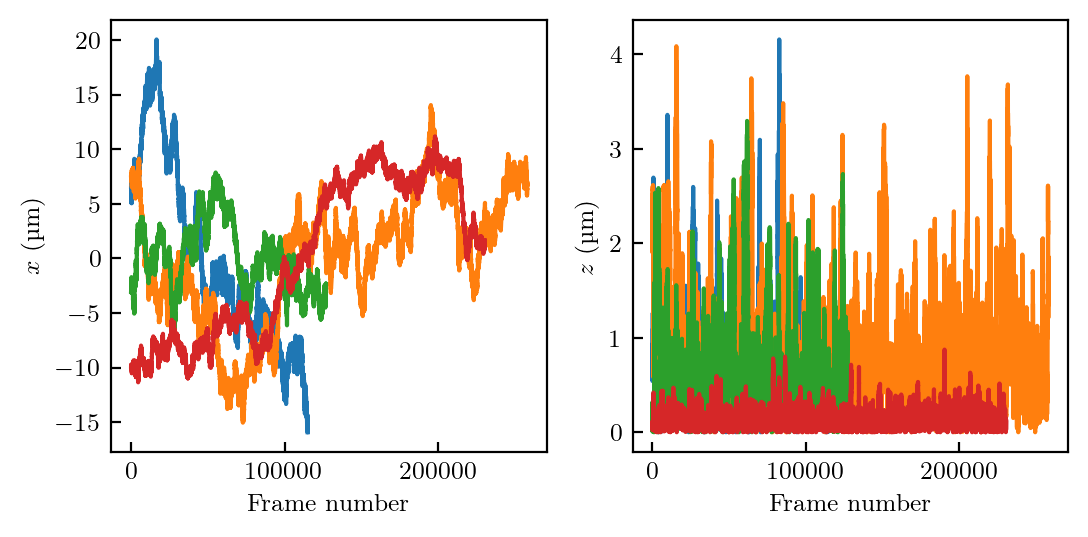

In [25]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(14/2.54, 7/2.54))

for i in range(len(xs_PS_w)):
    x, z = xs_PS_w[i], zs_PS_w[i]
    ax1.plot(x*1e6)
    ax2.plot(z*1e6)

ax1.set(
    xlabel='Frame number',
    ylabel='$x$ (µm)', 
)
ax2.set(
    xlabel='Frame number',
    ylabel='$z$ (µm)', 
)

plt.tight_layout()
plt.show()

In [26]:
# Dedrift trajectories

dd_PS_wEG30 = DedriftTrajectories(datas_PS_wEG30, fps_PS_wEG30, a_PS_wEG30, eta_PS_wEG30, factor=factor)
dd_PS_wEG30.dedrift()
datas_dedrift_PS_wEG30 = dd_PS_wEG30.datas_dedrift

print()

dd_AR1000_w = DedriftTrajectories(datas_AR1000_w, fps_AR1000_w, a_AR1000_w, eta_AR1000_w, factor=factor)
dd_AR1000_w.dedrift()
datas_dedrift_AR1000_w = dd_AR1000_w.datas_dedrift

print()

dd_AR1000_wEG30 = DedriftTrajectories(datas_AR1000_wEG30, fps_AR1000_wEG30, a_AR1000_wEG30, eta_AR1000_wEG30, factor=factor)
dd_AR1000_wEG30.dedrift()
datas_dedrift_AR1000_wEG30 = dd_AR1000_wEG30.datas_dedrift

print()

dd_AR1000_wEG40 = DedriftTrajectories(datas_AR1000_wEG40, fps_AR1000_wEG40, a_AR1000_wEG40, eta_AR1000_wEG40, factor=factor)
dd_AR1000_wEG40.dedrift()
datas_dedrift_AR1000_wEG40 = dd_AR1000_wEG40.datas_dedrift

print()

Dedrifting on 25 times the equilibrium time.


/home/n.fares/miniconda3/envs/holography/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',



Dedrifting on 25 times the equilibrium time.


/home/n.fares/miniconda3/envs/holography/lib/python3.9/site-packages/ComputeObservables.py:266: RuntimeWarning: Mean of empty slice
  res[i] = np.nanmean(distribution)
/home/n.fares/miniconda3/envs/holography/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,



Dedrifting on 25 times the equilibrium time.

Dedrifting on 25 times the equilibrium time.



In [27]:
datas_dedrift_AR1000_wEG30 == []

False

In [28]:
dd = dd_AR1000_wEG40

Dedrifting on 25 times the equilibrium time.


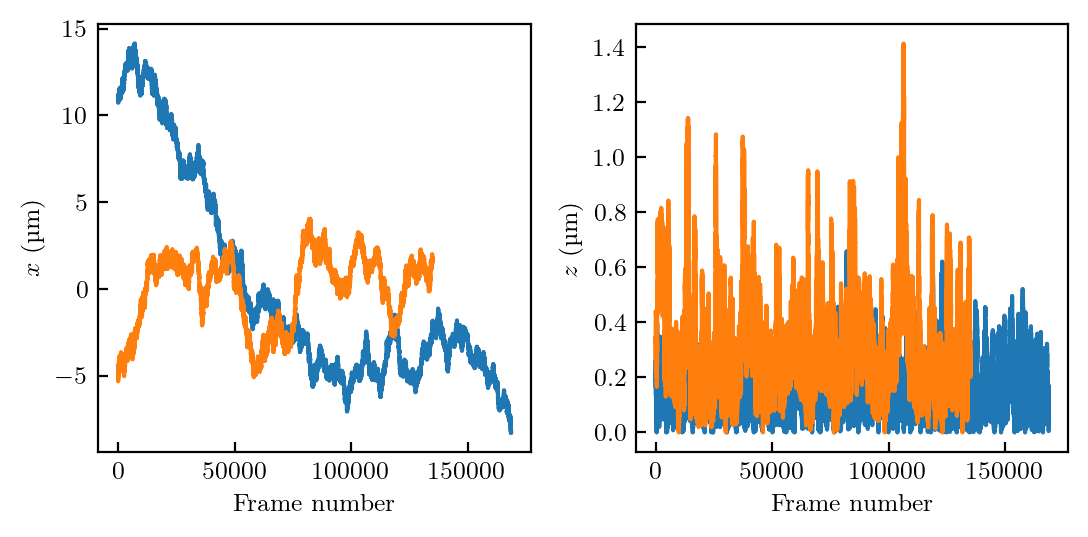

In [29]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(14/2.54, 7/2.54))

xs, ys, zs = dd.explicit_datas_dedrift()

for i in range(len(xs)):
    x, z = xs[i], zs[i]
    ax1.plot(x*1e6)
    ax2.plot(z*1e6)

ax1.set(
    xlabel='Frame number',
    ylabel='$x$ (µm)', 
)
ax2.set(
    xlabel='Frame number',
    ylabel='$z$ (µm)', 
)

plt.tight_layout()
plt.show()

# Data Analysis: Compare Observables From Different Experimental Conditions

In [30]:
# Main goal for now = forces tot

In [31]:
# (Semi) Theoretical Equilibrium PDF and Force

def _P_eq(z, B, lD, lB):
    return np.exp(-B * np.exp(-z / lD) - z / lB)

def P_eq(z, z0, B, lD, lB, normalize=True):
    z = z - z0
    if type(z) == float:
        if z < 0:
            res = 0
        return _P_eq(z, B, lD, lB)
    res = _P_eq(z, B, lD, lB)
    res[z < 0] = 0
    if normalize:
        res = res / np.trapz(res, z) # Ok because it is a change of variable
    return res

def F_eq(z, z0, B, lD, lB):
    z = np.copy(z)
    z = z - z0  
    res = 4e-21 * (B / lD * np.exp(-z / lD) - 1 / lB)
    return res

In [32]:
# Theoretical diffusion profiles (normalized by DO)

def Dz_z(z, b=0, nl=0, r=1.5e-6):
    z = z + b
    res = (6 * z * z + 2 * r * z) / (6 * z * z + 9 * r * z + 2 * r * r)
    res += nl
    return res

def Dx_z(z, b=0, nl=0, r=1.5e-6):
    z = z + b 
    res = 1 - 9/16 * (r / (z + r)) + 1/8 * (r / (z + r)) ** 3 - 45/256 * (r / (z + r)) ** 4 - 1/16 * (r / (z + r)) ** 5
    res += nl
    return res

def Dz_z_prime(z, b=0, nl=0, r=1.5e-6):
    z = z + b 
    return (42 * r*(z**2) + 24 * (r**2)*z + 4 * (r**3)) / (6 * (z**2) + 9 * r*z + 2 * (r**2))**2

# def Dprime_over_D(z, offset_D, nl=0):
#     return (42 * r*(z**2) + 24 * (r**2)*z + 4 * (r**3)) / (36 * (z**4) + 66 * r*(z**3) + 30 * (r**2)*(z**2) + 4 * (r**3)*z)

In [76]:
class Observables():
    """
    Compute several observables, for several trajectories.
    """
    
    def __init__(
        self, 
        datas, 
        fps, 
        aps, 
        eta_m, 
        delta_frame_nb=np.arange(1, 100, 1), 
        n_noisy = 50, 
        min_distance=50e-9, 
        max_distance=2e-6, 
        n_bins = 50, 
    ):
        """
        Input
        -----
        
        datas: list of np.ndarrays
            Each element of the list corresponds to one trajectory. 
            Format: lines = time steps & columns = x, y, z.
            Must be corrected trajectories.
        fps: list of ints
            fps of each experiments.
        aps: list of floats
            Radius of each experiments.
        eta_m: float
            Viscosity of the surrounding medium. 
            
        - PDF
        min_distance: float
            Minimal distance to compute Peq and Feq. 
        max_distance: float
            Becomes a list in the class, to account for different z-range for different particle sizes.
            
        """
        self.datas = datas
        self.fps = fps
        self.aps = aps
        self.eta_m = eta_m
        
        self.delta_frame_nb = delta_frame_nb
        
        self.n_noisy = n_noisy
        self.min_distance = min_distance
        self.max_distance = [max_distance for i in range(len(self.fps))]
        self.n_bins = n_bins
        
        self.xs, self.ys, self.zs = self.unpack_datas()
        
        self.D0s = self.compute_D0s()
        
        self.tau_MSDs = []
        self.MSD_paras = []
        self.MSD_perps = []
        
        self.x_Peqs = []
        self.w_Peqs = []
        self.y_Peqs = []
        self.e_Peqs = []
        
        self.x_Feqs = []
        self.w_Feqs = []
        self.y_Feqs = []
        self.e_Feqs = []
        
        self.y_Peqs_smooth = []
        self.y_Feqs_smooth = []
        self.xmaxs = []
        
        self.z_difs = []
        self.Dperps = []
        self.Dparas = []
        
        self.MSD_done = False
        self.PDF_done = False
        
    
    def unpack_data(self, data):
        x = data[:,0]
        y = data[:,1]
        z = data[:,2]
        return x, y, z
    
    def unpack_datas(self):
        self.xs, self.ys, self.zs = [], [], []
        for i, data in enumerate(self.datas):
            x, y, z = self.unpack_data(data)
            self.xs.append(x)
            self.ys.append(y)
            self.zs.append(z)
        return self.xs, self.ys, self.zs
    
    
    def get_xyz_i(self, i):
        return self.xs[i], self.ys[i], self.zs[i]
    
    
    def compute_D0s(self, return_D0s=False):
        self.D0s = [4e-21 / (6 * np.pi * self.eta_m * a) for a in self.aps]
        if return_D0s:
            return self.D0s
    
    
    def MSD(self):
        
        if not(self.MSD_done):
        
            self.compute_D0s()

            for i, data in enumerate(self.datas):

                x, y, z = self.get_xyz_i(i)

                MSD_x, _ = co.moment(2, x, self.delta_frame_nb, return_std = True, retrieve_mean = True) # Function in wrapper
                MSD_y, _ = co.moment(2, y, self.delta_frame_nb, return_std = True, retrieve_mean = True)
                MSD_z, _ = co.moment(2, z, self.delta_frame_nb, return_std = True, retrieve_mean = True)
                MSD_para = (MSD_x + MSD_y) / 2
                MSD_perp = np.copy(MSD_z)

                self.tau_MSDs.append(self.delta_frame_nb / self.fps[i])
                self.MSD_paras.append(MSD_para)
                self.MSD_perps.append(MSD_perp)

                self.MSD_done = True
        
        else:
            print('MSDs were already computed')
    
    
    def get_max_distance_pdf(self, z):
        return min([max_distance, np.max(z) // 2])
        # return max_distance
    
    
    def PDF(self):
        
        if not(self.PDF_done):
        
            for i, data in enumerate(self.datas):

                _, _, z = self.get_xyz_i(i)

                self.max_distance[i] = self.get_max_distance_pdf(z)

                data_P_eq, data_F_eq = co.PeqFeq(z, self.n_noisy, self.min_distance, max_distance, self.n_bins)
                x_pdf_z, width_pdf_z, y_pdf_z, _, err_y_pdf_z = data_P_eq.values()
                x_F_eq, width_F_eq, y_F_eq, _, err_y_F_eq = data_F_eq.values()

                self.x_Peqs.append(x_pdf_z)
                self.w_Peqs.append(width_pdf_z)
                self.y_Peqs.append(y_pdf_z)
                self.e_Peqs.append(err_y_pdf_z)

                self.x_Feqs.append(x_F_eq)
                self.w_Feqs.append(width_F_eq)
                self.y_Feqs.append(y_F_eq)
                self.e_Feqs.append(err_y_F_eq)

            del data_P_eq, data_F_eq
            del x_pdf_z, width_pdf_z, y_pdf_z, err_y_pdf_z
            del x_F_eq, width_F_eq, y_F_eq, err_y_F_eq

            self.PDF_done = True
        
        else:
            print('Peqs and Feqs were already computed')
    
    
    def smooth_PDF(self, bins_centers, pdf, window=21, order=3):
        zmax_naive = bins_centers[pdf == np.max(pdf)][0]
        interval = [self.min_distance, zmax_naive + 300e-9]
        pdf = pdf[(interval[0] <= bins_centers) & (bins_centers <= interval[1])]
        bins_centers = bins_centers[(interval[0] <= bins_centers) & (bins_centers <= interval[1])]
        p_s = savgol_filter(pdf, window, order)
        p = lambda z: np.interp(z, bins_centers, p_s)
        # dpdz_s = savgol_filter(pdf, window, order, deriv=1)
        dpdz_s = np.gradient(p_s, bins_centers)
        dpdz = lambda z: np.interp(z, bins_centers, dpdz_s)
        F_s = 4e-21 * np.gradient(np.log(p_s), bins_centers)
        F = lambda z: np.interp(z, bins_centers, F_s)
        return p, dpdz, F
    
    
    def _get_PDF_mean(self, bins_centers, pdf, epsilon=20e-9, p0=[100e-9], window=21, order=3):
        p, dpdz, F = self.smooth_PDF(bins_centers, pdf, window=window, order=order)
        xmax = np.trapz(bins_centers * pdf, bins_centers) / np.trapz(pdf, bins_centers)
        return xmax
    
    
    def _get_PDF_max(self, bins_centers, pdf, epsilon=20e-9, p0=[100e-9], window=21, order=3):
        p, dpdz, F = self.smooth_PDF(bins_centers, pdf, window=window, order=order)
        xmax = fsolve(dpdz, p0, xtol=epsilon)[0]
        return xmax
    
    
    def get_PDF_max(self, epsilon=10e-9, p0=[100e-9], window=21, order=3):
        if self.PDF_done:
            self.xmaxs = []
            for i, pdf in enumerate(self.y_Peqs):
                bins_centers = self.x_Peqs[i]
                xmax = self._get_PDF_max(bins_centers, pdf, epsilon=epsilon, p0=p0, window=window, order=order)
                self.xmaxs.append(xmax)
        else:
            self.PDF()
            self.get_PDF_max()
    
    def _get_PDF_max_naive(self, i):
        bins_centers, pdf = self.x_Peqs[i], self.y_Peqs[i]
        pmax = np.max(pdf)
        condition = (pdf == np.max(pdf))
        index = list(condition).index(True)
        # xmax = bins_centers[condition]
        # xmax = xmax[0]
        xmax = bins_centers[index]
        return index, xmax, pmax
    
    
    def get_PDF_max_naive(self):
        if self.PDF_done:
            self.xmaxs = []
            for i, pdf in enumerate(self.y_Peqs):
                bins_centers = self.x_Peqs[i]
                xmax = bins_centers[pdf == np.max(pdf)]
                xmax = xmax[0]
                self.xmaxs.append(xmax)
        else:
            self.PDF()
            self.get_PDF_max_naive()
    
    
    def choose_direction(self, i, string):
        if string == 'x':
            res = self.datas[i][:,0]
        elif string == 'y':
            res = self.datas[i][:,1]
        elif string == 'z':
            res = self.datas[i][:,2]
        else: 
            print("You must choose a direction which is either 'x', 'y' or 'z'.")
            # try:
            #     string = input('Enter the direction again: direction = ? ')
            #     res = choose_direction(i, string)
            # except:
            #     print('An error occured. So the z component is used.')
        return res
    
    
    def choose_theoretical_diffusion(self, i, string):
        a = self.aps[i]
        if string in ['x', 'y']:
            Dd = lambda zz: Dx_z(zz, b=0, nl=0, r=a)
            Ddp = lambda zz: 1
        else:
            Dd = lambda zz: Dz_z(zz, b=0, nl=0, r=a)
            Ddp = lambda zz: Dz_z_prime(zz, b=0, nl=0, r=a)
        return Dd, Ddp
    
    
    def average_z_curve(self, z, fz, interval):
        fz_interest = fz[(interval[0] <= z) & (z < interval[1])]
        fz_av = np.nanmean(fz_interest)
        return fz_av
        
    
    def _force_drift(self, i, direction='z', interval=[50e-9, 200e-9], bins=10, times=[1], kT=4e-21):
        
        z = self.choose_direction(i, direction)
        Dd, Ddp = self.choose_theoretical_diffusion(i, direction)
        D0 = self.D0s[i]
        
        bins_edges = np.linspace(interval[0], interval[1], bins)
        vz, err_vz = co.vzz(bins_edges, z, times=times, fps=self.fps[i])
        
        bins_centers = (bins_edges[1:] + bins_edges[:-1]) / 2
        Ddz = Dd(bins_centers)
        Ddpz = Ddp(bins_centers)
        
        F1 = kT / (D0 * Ddz) * vz 
        F2 = - kT * Ddpz / Ddz
        force = F1 + F2
        
        zzz = bins_centers
        
        return zzz, force
    
    
    def _force_drift_averaged(self, i, direction='z', interval=[50e-9, 200e-9], bins=10, times=[1], kT=4e-21):
        _, force = self._force_drift(i, direction=direction, interval=interval, bins=bins, times=times, kT=kT)
        force_averaged = np.nanmean(force)
        return force_averaged
    
    
    def define_interval(self, center, deltam, deltap, absolute_min=50e-9):
        inf = max([center-deltam, absolute_min])
        sup = center+deltap
        interval = [inf, sup]
        return interval
    
    
    def define_interval_proba(self, i, factor=np.sqrt(2), absolute_min=50e-9):
        if self.PDF_done:
            
            xx, pp = self.x_Peqs[i], self.y_Peqs[i]
            index, xmax, pmax = self._get_PDF_max_naive(i)
            
            condition = (pp >= pmax / factor)
            
            wanted_xx = xx[condition]
            xxmin = max([wanted_xx[0], absolute_min])
            xxmax = wanted_xx[-1]
            
            res = [xxmin, xxmax]
            
        else:
            print('Compute the PDFs and come back.')
            res = [-2, -1]
        return res
    
    
    def force_drift(self, direction='z', deltam=50e-9, deltap=50e-9, bins=10, times=[1], factor=np.sqrt(2)):
        
        Feq_averaged = np.zeros(len(self.y_Feqs))
        Ftot_averaged = np.zeros(len(self.y_Feqs))
        
        intervals = np.zeros((len(self.y_Feqs), 2))
        
        # Compute max PDF positions
        self.get_PDF_max_naive()
        
        for i, Feq in enumerate(self.y_Feqs):
            
            # Get max and define interval around the max
            xmax = self.xmaxs[i]
            inf = min([xmax-deltam, 50e-9])
            sup = xmax+deltap
            interval = [inf, sup]
            # interval = self.define_interval_proba(i, factor=factor, absolute_min=50e-9)
            
            # Average around max
            Feq_av = self.average_z_curve(self.x_Feqs[i], Feq, interval)
            Ftot_av = self._force_drift_averaged(i, direction=direction, interval=interval, bins=bins, times=times)
            
            # Update arrays
            interval = np.array(interval)
            intervals[i,:] = np.copy(interval)
            Feq_averaged[i] = Feq_av
            Ftot_averaged[i] = Ftot_av
        
        Fnc_averaged = Ftot_averaged - Feq_averaged
        
        return intervals, Feq_averaged, Ftot_averaged, Fnc_averaged
    
    
    def define_bins(self, interval, bins):
        bins_edges = np.linspace(interval[0], interval[1], bins)
        bins_centers = (bins_edges[1:] + bins_edges[:-1]) / 2
        return bins_edges, bins_centers
    
    
    def _Dz_naive(self, i_exp, i_tau=1, direction='z', interval=[50e-9, 200e-9], bins=10):
        
        # Get the experimental data
        z = self.choose_direction(i_exp, direction) # Experiment i_exp, one given direction 
        # Get the z-data (z is the binning parameter)
        z_ref = self.choose_direction(i_exp, 'z')
        # Time to compute diffusion
        tau = i_tau / self.fps[i_exp]
        # Binning
        bins_edges, bins_centers = self.define_bins(interval=interval, bins=bins)
        
        # Compute displacements over i_tau time steps.
        dz = z[i_tau:] - z[:-i_tau]
        
        # The displacements needs to be sorted according to z 
        Dz = np.zeros(len(bins_centers))
        for i in range(len(bins_edges)-1):
            left, right = bins_edges[i], bins_edges[i+1] # Bin to consider
            temp = [] # Will contain all the dz which verify z in bin
            for j, d in enumerate(dz):
                if (left <= z_ref[j]) & (z_ref[j] < right):
                    temp.append(d)
            temp = np.array(temp)
            Dz[i] = np.nanmean(temp ** 2) / (2 * tau)
        
        return bins_centers, Dz
    
    
    def Dz_naive(self, direction='z', deltam=50e-9, deltap=50e-9, absolute_min=50e-9, i_tau=1, bins=10):
        zzs = []
        Dzs = []
        for i_exp, data in enumerate(self.datas): 
            interval = self.define_interval(self.xmaxs[i_exp], deltam, deltap, absolute_min)
            zz, Dz = self._Dz_naive(i_exp, i_tau=i_tau, direction=direction, interval=interval, bins=bins)
            zzs.append(zz)
            Dzs.append(Dz)
        return zzs, Dzs

In [77]:
class Theory(Observables): 
    def __init__(self):
        pass

In [78]:
class Plot(Theory):
    def __init__(self):
        pass

## Initialize the class

In [79]:
# MSD 

delta_frame_nb = np.concatenate(
    (
        np.arange(1, 10, 1),
        np.arange(10, 100, 10),
        np.arange(100, 1000, 100),
        np.arange(1000, 70000, 1000),
    )
)

In [80]:
# Peq

n_noisy = 100 # Number of iterations of the noise-adding procedure
min_distance = 50e-9 
max_distance = 2e-6
n_bins = 30

In [81]:
obs1 = Observables(
    datas_dedrift_PS_w, fps_PS_w, a_PS_w, eta_PS_w, 
    delta_frame_nb=delta_frame_nb, 
    n_noisy=n_noisy, min_distance=min_distance, max_distance=max_distance, n_bins=n_bins,
)

In [82]:
obs2 = Observables(
    datas_dedrift_PS_wEG30, fps_PS_wEG30, a_PS_wEG30, eta_PS_wEG30,
    delta_frame_nb=delta_frame_nb, 
    n_noisy=n_noisy, min_distance=min_distance, max_distance=max_distance, n_bins=n_bins,
)

In [83]:
obs3 = Observables(
    datas_dedrift_AR1000_w, fps_AR1000_w, a_AR1000_w, eta_AR1000_w,
    delta_frame_nb=delta_frame_nb, 
    n_noisy=n_noisy, min_distance=min_distance, max_distance=max_distance, n_bins=n_bins,
)

In [84]:
obs4 = Observables(
    datas_dedrift_AR1000_wEG30, fps_AR1000_wEG30, a_AR1000_wEG30, eta_AR1000_wEG30, 
    delta_frame_nb=delta_frame_nb, 
    n_noisy=n_noisy, min_distance=min_distance, max_distance=max_distance, n_bins=n_bins,
)

In [85]:
obs5 = Observables(
    datas_dedrift_AR1000_wEG40, fps_AR1000_wEG40, a_AR1000_wEG40, eta_AR1000_wEG40, 
    delta_frame_nb=delta_frame_nb, 
    n_noisy=n_noisy, min_distance=min_distance, max_distance=max_distance, n_bins=n_bins,
)

In [86]:
all_obs = [obs1, obs2, obs3, obs4, obs5]

In [87]:
colors = [
    'k', 'gray', 'tab:red', 'tab:blue', 'brown', 
    'mediumslateblue', 'lightcoral', 'sandybrown', 'burlywood', 'rosybrown', 
    'yellowgreen', 'seagreen', 'tab:green', 
]

## Mean Square Displacement

In [88]:
# obs1.MSD()
for obs in all_obs:
    obs.MSD()

/home/n.fares/miniconda3/envs/holography/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/n.fares/miniconda3/envs/holography/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/n.fares/miniconda3/envs/holography/lib/python3.9/site-packages/ComputeObservables.py:266: RuntimeWarning: Mean of empty slice
  res[i] = np.nanmean(distribution)
/home/n.fares/miniconda3/envs/holography/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [123]:
obs = obs3

In [124]:
# obs.tau_MSDs

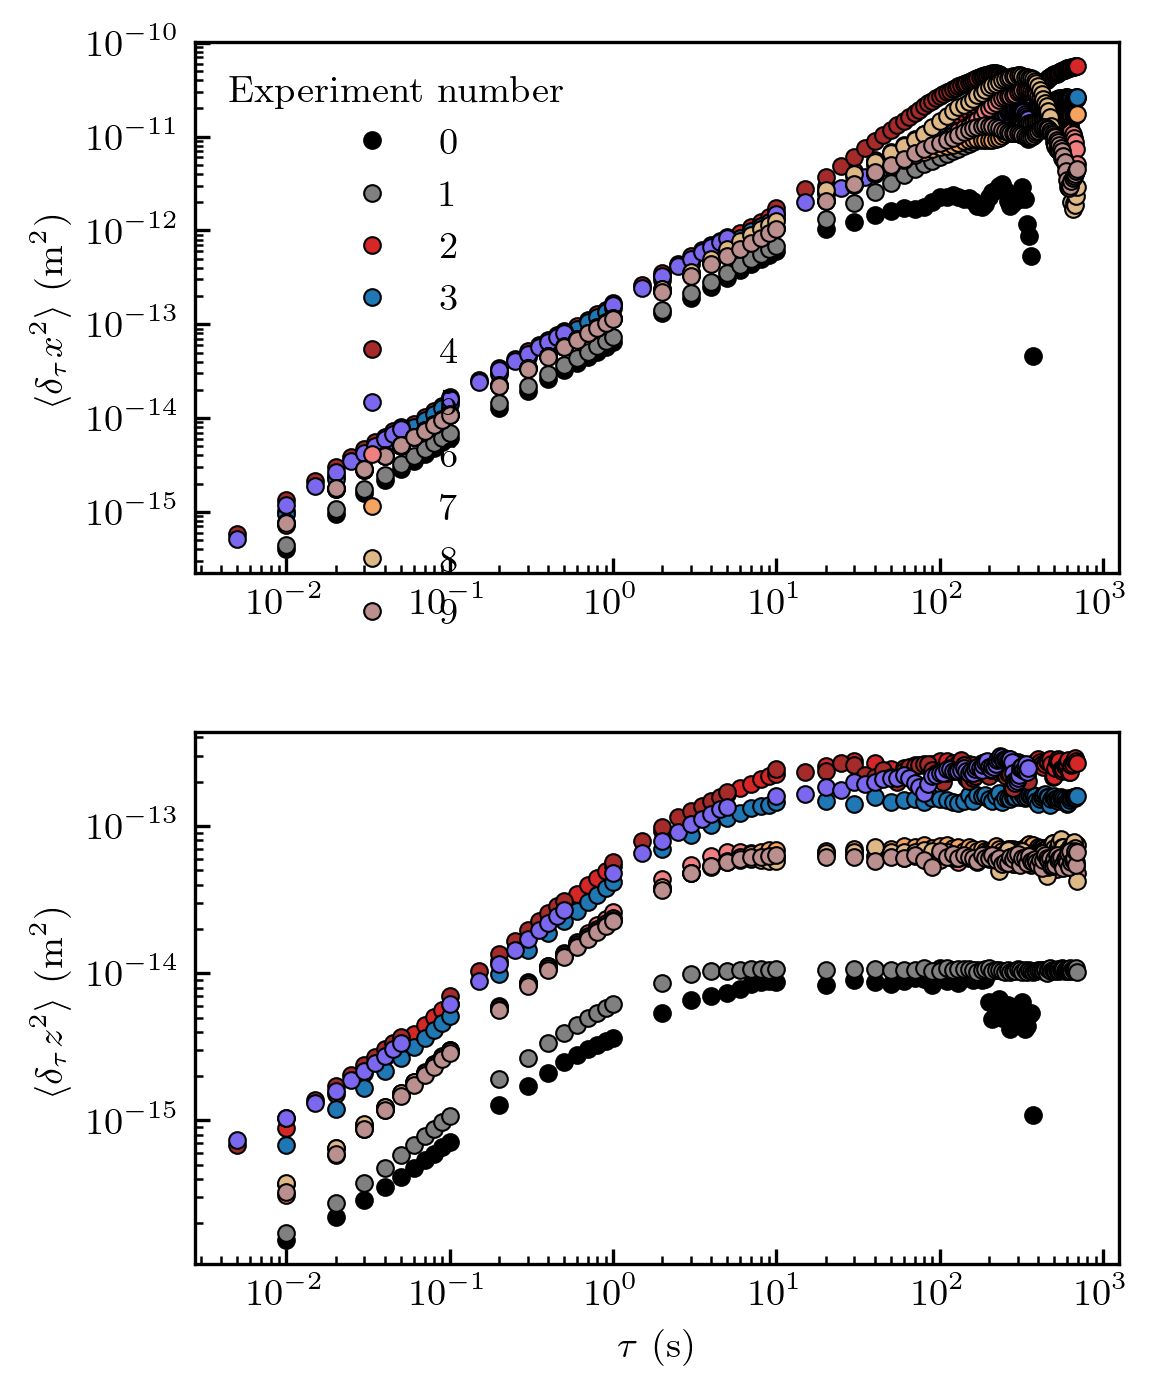

In [125]:
# Plot MSD of several experiments, but one experimental condition

fig, [ax1, ax2] = plt.subplots(2, 1, figsize = (10 / 2.54, 12 / 2.54), dpi=300)

for i in range(len(obs.fps)):
    tau_MSD = obs.tau_MSDs[i]
    MSD_para = obs.MSD_paras[i]
    MSD_perp = obs.MSD_perps[i]
    
    ax1.plot(tau_MSD, MSD_para, 'o', mfc=colors[i], markersize=4, markeredgecolor='k', markeredgewidth=0.5, label=i)
    ax2.plot(tau_MSD, MSD_perp, 'o', mfc=colors[i], markersize=4, markeredgecolor='k', markeredgewidth=0.5, label=i)

ax1.legend(frameon=False, title='Experiment number')
# ax2.legend(frameon=False, title='Experiment #')

ax1.set(
    xscale='log', 
    yscale='log', 
    # xlabel=r'$\tau$ (s)', 
    ylabel=r'$\langle \delta_\tau x ^2 \rangle$ $\mathrm{(m^2)}$', 
)

ax2.set(
    xscale='log', 
    yscale='log', 
    xlabel=r'$\tau$ (s)', 
    ylabel=r'$\langle \delta_\tau z ^2 \rangle$ $\mathrm{(m^2)}$', 
)

plt.tight_layout()
plt.show()

## Equilibrium PDF And Force

In [126]:
# n_noisy = 100 # Number of iterations of the noise-adding procedure
# min_distance = 50e-9 
# max_distance = 2e-6
# n_bins = 20

In [127]:
for obs in all_obs:
    obs.PDF()

Peqs and Feqs were already computed
Peqs and Feqs were already computed
Peqs and Feqs were already computed
Peqs and Feqs were already computed
Peqs and Feqs were already computed


In [94]:
# Choose one experimental condition
obs = obs3

In [95]:
# # Plot Peq and Feq

# fig, [ax1, ax3] = plt.subplots(2, 1, figsize = (8 / 2.54, 15 / 2.54), dpi=300)

# for i in range(len(obs.fps)):
    
#     x_pdf_z, width_pdf_z, y_pdf_z, err_y_pdf_z = obs.x_Peqs[i], obs.w_Peqs[i], obs.y_Peqs[i], obs.e_Peqs[i]
#     x_F_eq, width_F_eq, y_F_eq, err_y_F_eq = obs.x_Feqs[i], obs.w_Feqs[i], obs.y_Feqs[i], obs.e_Feqs[i]
    
#     ax1.errorbar(
#         x_pdf_z * 1e6, y_pdf_z * 1e-6, yerr=err_y_pdf_z * 1e-6 / 2, xerr=width_pdf_z/2*1e6, 
#         ls='', marker='o', markersize=8, 
#         markerfacecolor=colors[i], 
#         markeredgewidth=1, markeredgecolor='k', 
#         ecolor='k', capsize=3, 
#         # label=i, 
#     )
#     ax1.plot(
#         x_pdf_z[(50e-9 <= x_pdf_z) & (x_pdf_z <= 500e-9)] * 1e6, 
#         obs.smooth_PDF(x_pdf_z, y_pdf_z, window=11, order=2)[0](x_pdf_z[(50e-9 <= x_pdf_z) & (x_pdf_z <= 500e-9)]) * 1e-6, 
#         ls='-', c='k', 
#         zorder=3, 
#     )
    
#     ax3.errorbar(
#         x_F_eq * 1e6, y_F_eq * 1e15, yerr=err_y_F_eq / 2 * 1e15, xerr=width_F_eq/2*1e6, 
#         ls='', marker='s', markersize=8, 
#         markerfacecolor=colors[i], 
#         markeredgewidth=1, markeredgecolor='k', 
#         ecolor='k', capsize=3,
#     )
#     ax3.plot(x_F_eq * 1e6, obs.smooth_PDF(x_pdf_z, y_pdf_z, window=11, order=2)[2](x_F_eq) * 1e15, ls='-', c=colors[i])

# # ax1.legend(frameon=False, title='Experiment number')

# ax1.set(
#     xscale='linear', 
#     yscale='log', 
#     # xlabel=r'$z$ (µm)', 
#     ylabel=r'$P_\mathrm{eq}$ (µm$^{-1}$)', 
# )

# ax3.set(
#     xscale='log', 
#     yscale='linear', 
#     xlabel=r'$z$ (µm)', 
#     ylabel=r'$F_\mathrm{eq}$ (fN)', 
# )

# plt.tight_layout()
# plt.show()

In [96]:
# obs.get_PDF_max(p0=[200e-9], window=11, order=2)
# obs.xmaxs

In [97]:
obs.get_PDF_max_naive()
np.array(obs.xmaxs) * 1e9

array([ 87.11627414,  77.03663302, 182.18444382, 142.46470781,
       297.93346668, 297.93346668, 142.46470781, 125.98106981,
       161.10510097, 142.46470781])

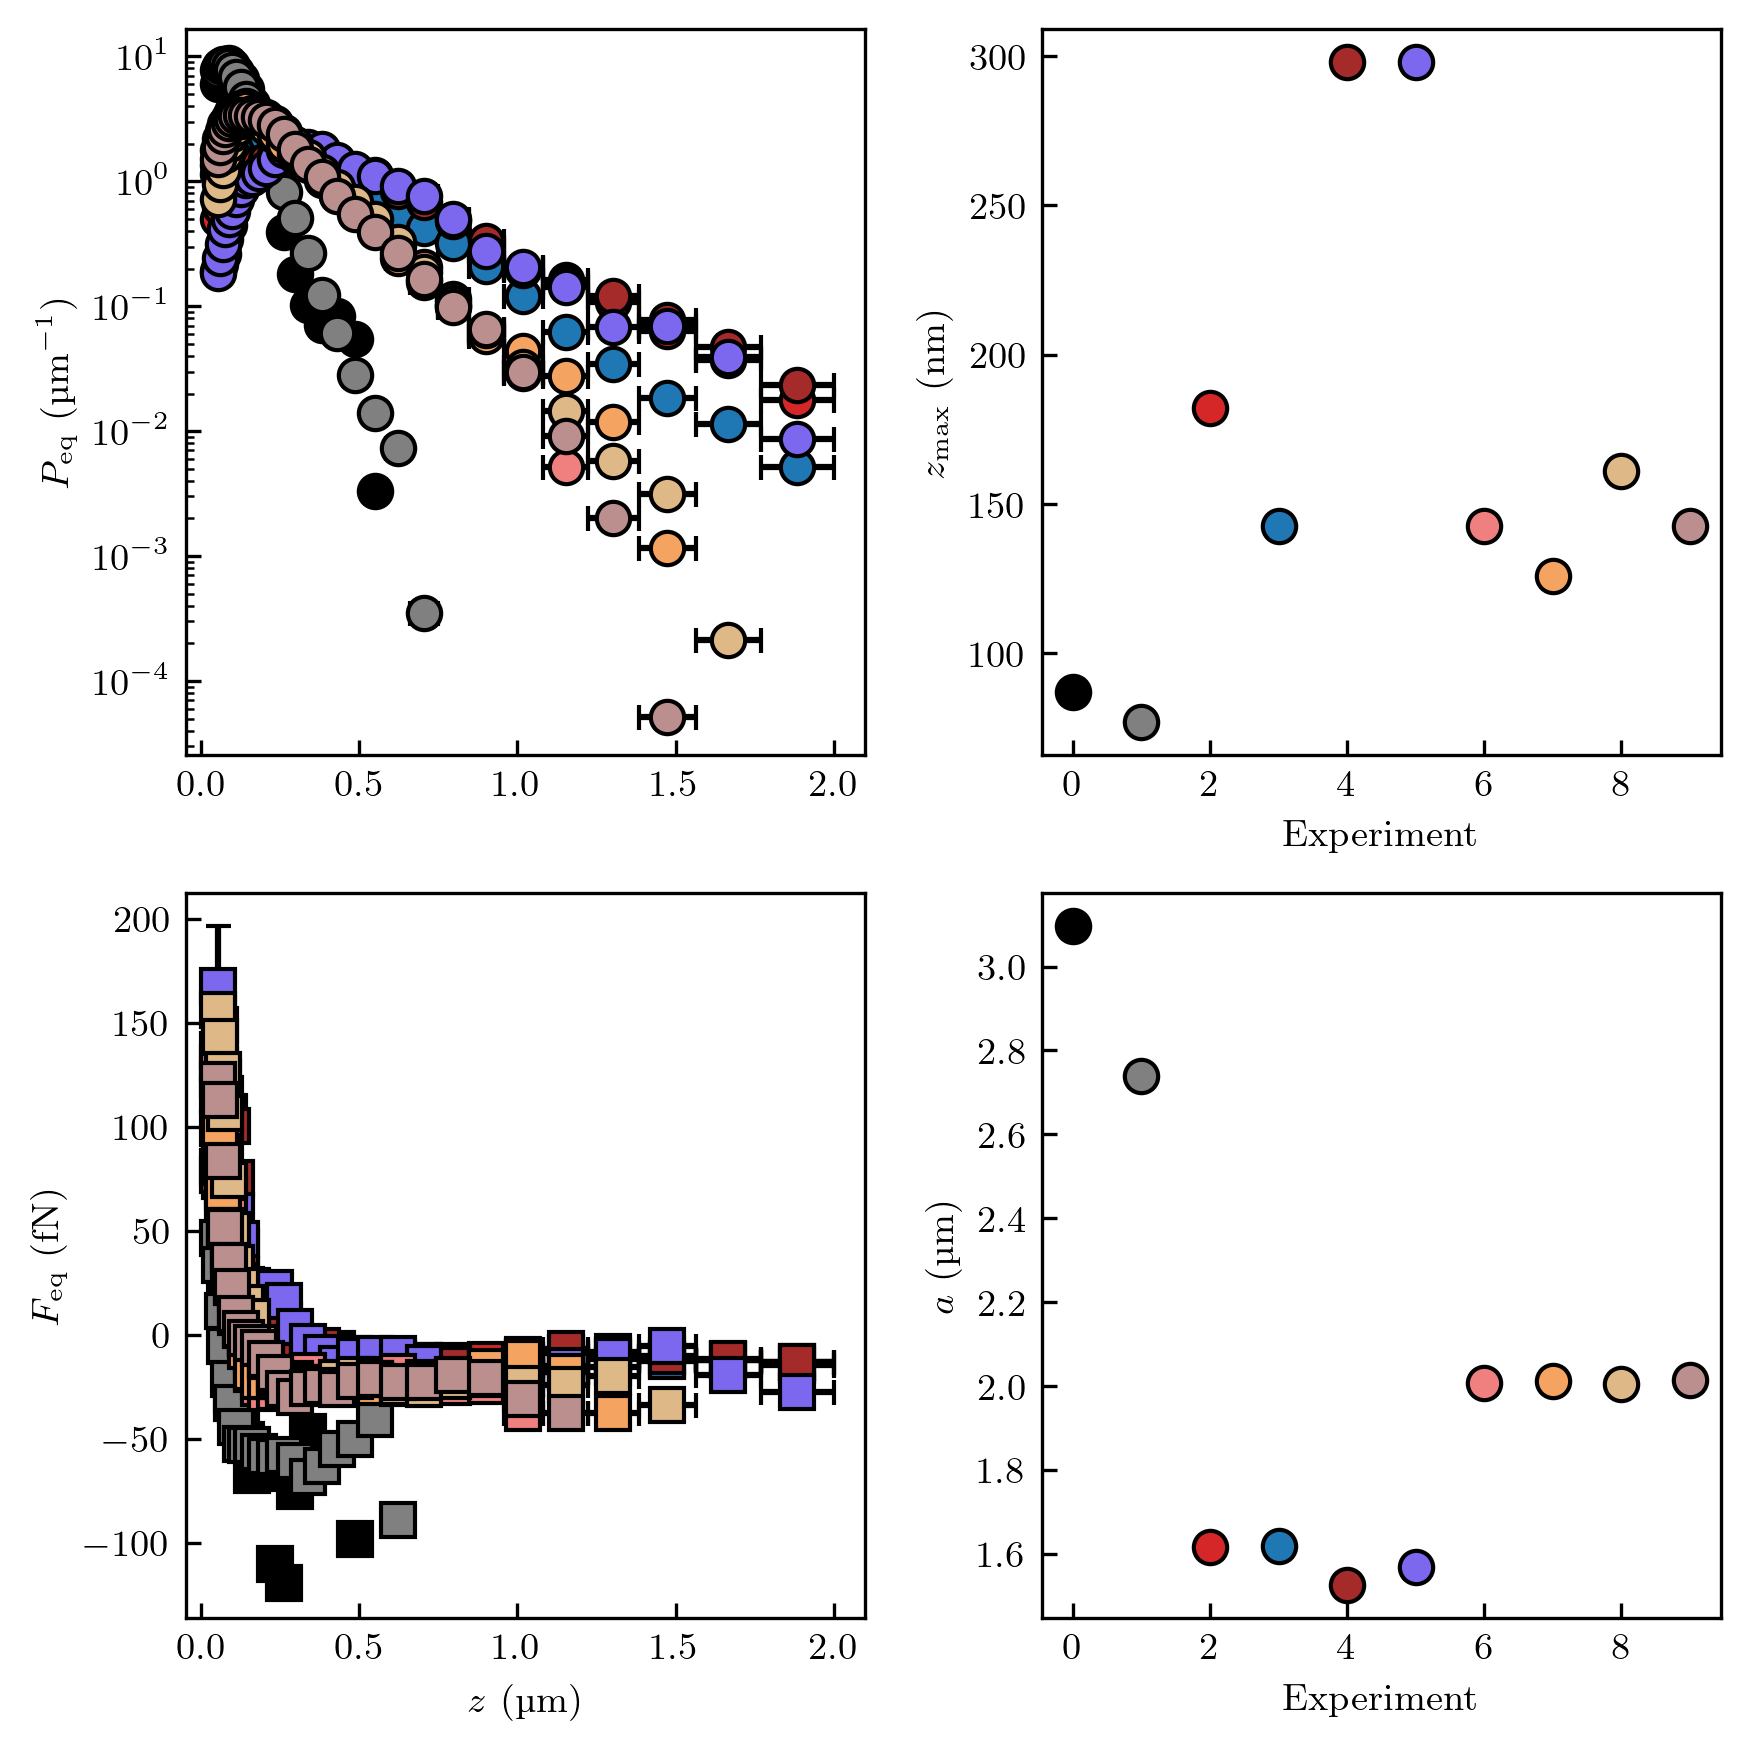

In [98]:
# Plot Peq and Feq

fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize = (15 / 2.54, 15 / 2.54), dpi=300)

for i in range(len(obs.fps)):
# for i in range(3, 4):
    
    x_pdf_z, width_pdf_z, y_pdf_z, err_y_pdf_z = obs.x_Peqs[i], obs.w_Peqs[i], obs.y_Peqs[i], obs.e_Peqs[i]
    x_F_eq, width_F_eq, y_F_eq, err_y_F_eq = obs.x_Feqs[i], obs.w_Feqs[i], obs.y_Feqs[i], obs.e_Feqs[i]
    
    ax1.errorbar(
        x_pdf_z * 1e6, y_pdf_z * 1e-6, yerr=err_y_pdf_z * 1e-6 / 2, xerr=width_pdf_z/2*1e6, 
        ls='', marker='o', markersize=8, 
        markerfacecolor=colors[i], 
        markeredgewidth=1, markeredgecolor='k', 
        ecolor='k', capsize=3, 
        # label=i, 
    )
    # ax1.plot(x_pdf_z * 1e6, y_pdf_z * 1e-6, ls='-', c=colors[i])
    
    ax3.errorbar(
        x_F_eq * 1e6, y_F_eq * 1e15, yerr=err_y_F_eq / 2 * 1e15, xerr=width_F_eq/2*1e6, 
        ls='', marker='s', markersize=8, 
        markerfacecolor=colors[i], 
        markeredgewidth=1, markeredgecolor='k', 
        ecolor='k', capsize=3,
    )
    # ax3.plot(x_F_eq * 1e6, y_F_eq * 1e15, ls='-', c=colors[i])
    
    
    ax2.plot(i, obs.xmaxs[i] * 1e9, 'o', mfc=colors[i], ms=8)
    
    ax4.plot(i, obs.aps[i] * 1e6, 'o', mfc=colors[i], ms=8)
    

# ax1.legend(frameon=False, title='Experiment number')

ax1.set(
    xscale='linear', 
    yscale='log', 
    # xlabel=r'$z$ (µm)', 
    ylabel=r'$P_\mathrm{eq}$ (µm$^{-1}$)', 
)

ax3.set(
    xscale='linear', 
    yscale='linear', 
    xlabel=r'$z$ (µm)', 
    ylabel=r'$F_\mathrm{eq}$ (fN)', 
)

ax2.set(
    xscale='linear', 
    yscale='linear', 
    xlabel=r'Experiment', 
    ylabel=r'$z_\mathrm{max}$ (nm)', 
)

ax4.set(
    xscale='linear', 
    yscale='linear', 
    xlabel=r'Experiment', 
    ylabel=r'$a$ (µm)', 
)

plt.tight_layout()
plt.show()

## Force From the Drifts

In [99]:
# For now, Brenner profiles are used instead of SFI (Ronceray). 
# This comes from the desire to compare several experiments.
# Including the ones for which we do not capture D(z) accurately. 
# This will increase the forces measured, 
# as D(z) always saturates to a greater value compared to Brenner's prediction. 

In [100]:
obs = obs4

In [101]:
intervals, Feq_averaged, Ftot_averaged, Fnc_averaged = obs.force_drift(deltam=50e-9, deltap=50e-9)

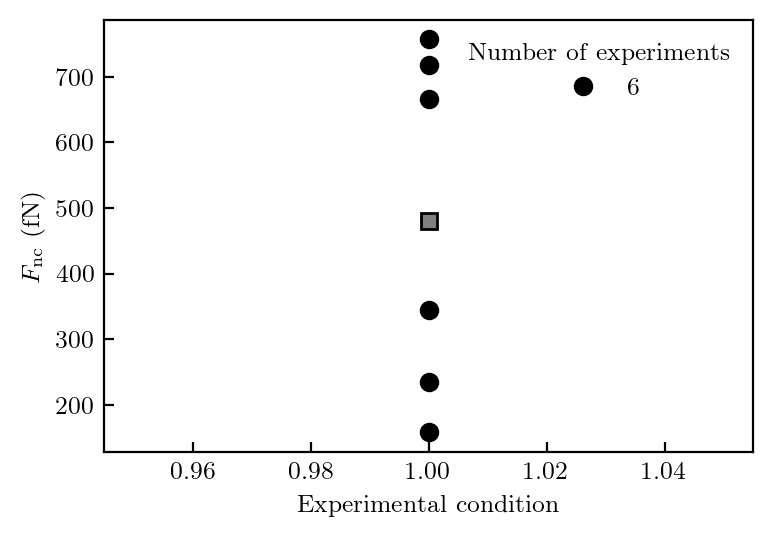

In [102]:
fig, ax1 = plt.subplots(1, 1, figsize=(10/2.54, 7/2.54))

n_exp = len(Feq_averaged)
ax1.plot(
    np.ones(n_exp), Fnc_averaged[:] * 1e15, 
    ls='', marker='o', mfc=colors[0], 
    label=int(n_exp)
)
ax1.plot(
    np.ones(1), np.nanmean(Fnc_averaged[:]) * 1e15, 
    ls='', marker='s', mfc=colors[1], 
)

ax1.legend(frameon=False, title='Number of experiments')

ax1.set(
    xlabel='Experimental condition', 
    ylabel=r'$F_\mathrm{nc}$ (fN)', 
)

plt.tight_layout()
plt.show()

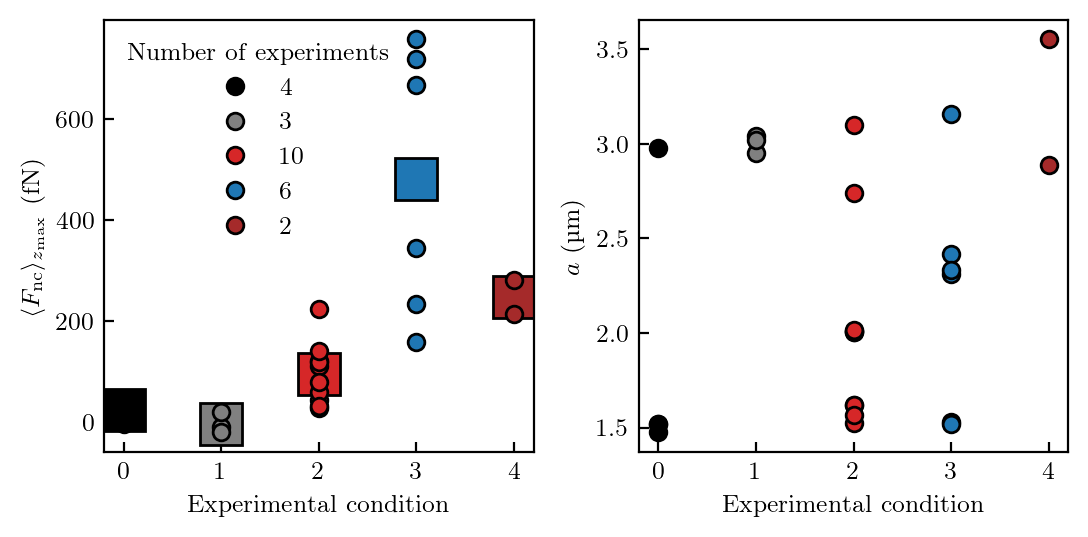

In [103]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(14/2.54, 7/2.54))

a_cut_1 = 2e-6

for i, obs in enumerate(all_obs):
    
    intervals, Feq_averaged, Ftot_averaged, Fnc_averaged = obs.force_drift(deltam=50e-9, deltap=50e-9)
    
    n_exp = len(Feq_averaged)
    ax1.plot(
        np.ones(n_exp) * i, Fnc_averaged * 1e15, 
        ls='', marker='o', mfc=colors[i], 
        label=int(n_exp), 
        zorder=3, 
    )
    ax1.plot(
        np.ones(1) * i, np.nanmean(Fnc_averaged) * 1e15, 
        ls='', marker='s', mfc=colors[i], ms=15, 
    )
    
    ax2.plot(
        np.ones(n_exp) * i, np.array(obs.aps) * 1e6, 
        ls='', marker='o', mfc=colors[i], 
    )

ax1.legend(frameon=False, title='Number of experiments')

ax1.set(
    xlabel='Experimental condition', 
    ylabel=r'$\langle F_\mathrm{nc} \rangle_{z_\mathrm{max}}$ (fN)', 
)

ax2.set(
    xlabel='Experimental condition', 
    ylabel=r'$a$ (µm)', 
)

plt.tight_layout()
plt.show()

/tmp/ipykernel_346217/3903734762.py:35: RuntimeWarning: Mean of empty slice
  np.ones(1) * i, np.nanmean(Fnc_1) * 1e15,
/tmp/ipykernel_346217/3903734762.py:35: RuntimeWarning: Mean of empty slice
  np.ones(1) * i, np.nanmean(Fnc_1) * 1e15,


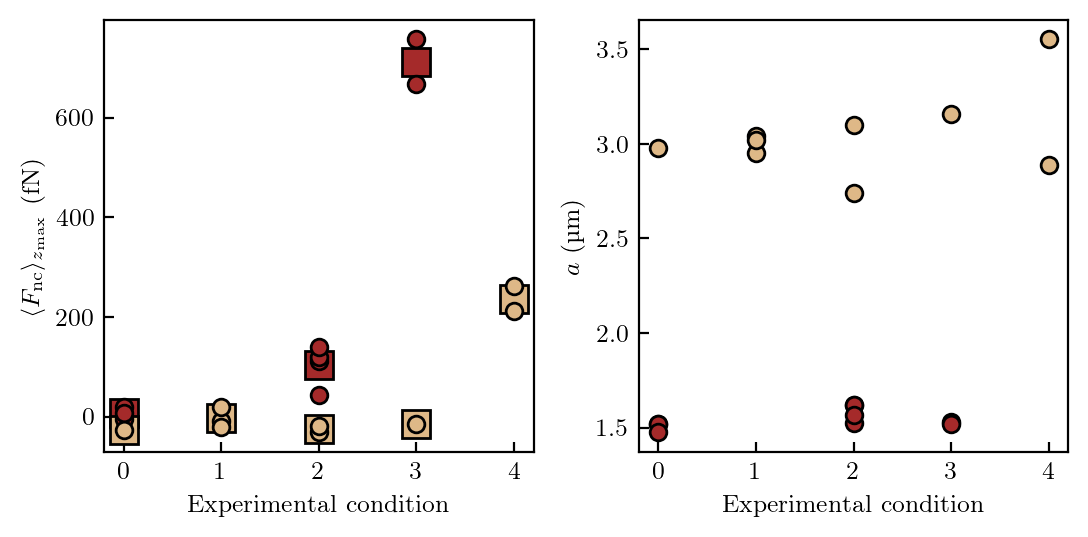

In [120]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(14/2.54, 7/2.54))

deltam = 25e-9
deltap = 50e-9
times = [1]

factor = 2

a_cut_1 = 2e-6
a_cut_2 = 2.5e-6

i_1 = 4
i_2 = 8

for i, obs in enumerate(all_obs):
    
    intervals, Feq_averaged, Ftot_averaged, Fnc_averaged = obs.force_drift(deltam=deltam, deltap=deltap, times=times, factor=factor)
    aps = np.array(obs.aps)
    
    condition = (aps < a_cut_1)
    a_1 = aps[condition]
    Fnc_1 = Fnc_averaged[condition] #/ obs.eta_m ** 2 #* np.array(obs.aps)[condition] ** (2)
    
    condition = (aps > a_cut_2)
    a_2 = aps[condition]
    Fnc_2 = Fnc_averaged[condition] #/ obs.eta_m ** 2 #* np.array(obs.aps)[condition] ** (2)
    
    n_exp_1 = len(Fnc_1)
    ax1.plot(
        np.ones(n_exp_1) * i, Fnc_1 * 1e15, 
        ls='', marker='o', mfc=colors[i_1],  
        zorder=3, 
    )
    ax1.plot(
        np.ones(1) * i, np.nanmean(Fnc_1) * 1e15, 
        ls='', marker='s', mfc=colors[i_1], ms=10, 
    )
    
    n_exp_2 = len(Fnc_2)
    ax1.plot(
        np.ones(n_exp_2) * i, Fnc_2 * 1e15, 
        ls='', marker='o', mfc=colors[i_2],  
        zorder=3, 
    )
    ax1.plot(
        np.ones(1) * i, np.nanmean(Fnc_2) * 1e15, 
        ls='', marker='s', mfc=colors[i_2], ms=10, 
    )
    
    
    ax2.plot(
        np.ones(n_exp_1) * i, a_1 * 1e6, 
        ls='', marker='o', mfc=colors[i_1], 
    )
    ax2.plot(
        np.ones(n_exp_2) * i, a_2 * 1e6, 
        ls='', marker='o', mfc=colors[i_2], 
    )


ax1.set(
    xlabel='Experimental condition', 
    ylabel=r'$\langle F_\mathrm{nc} \rangle_{z_\mathrm{max}}$ (fN)',
    # ylabel=r'$\langle F_\mathrm{nc} \rangle_{z_\mathrm{max}} \, / \, \eta_\mathrm{m}^2$ (not fN)', 
)

ax2.set(
    xlabel='Experimental condition', 
    ylabel=r'$a$ (µm)', 
)

plt.tight_layout()
plt.show()

In [112]:
obs = obs5

In [113]:
intervals, Feq_averaged, Ftot_averaged, Fnc_averaged = obs.force_drift(deltam=25e-9, deltap=25e-9)

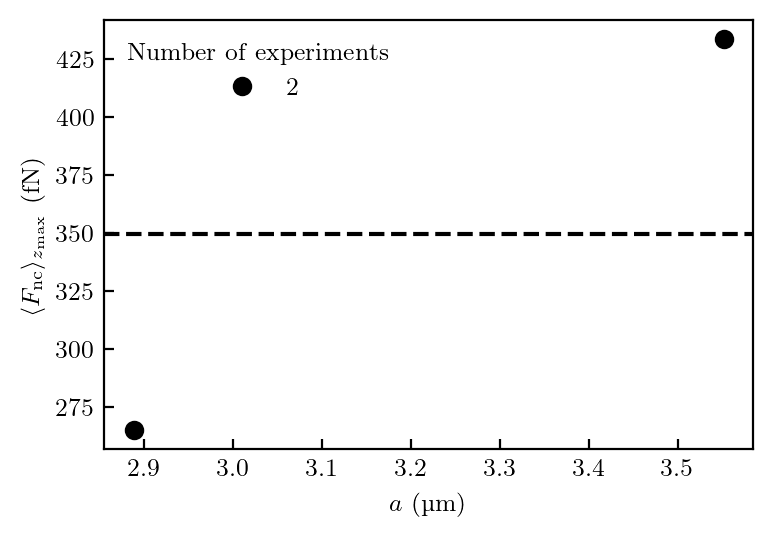

In [114]:
fig, ax1 = plt.subplots(1, 1, figsize=(10/2.54, 7/2.54))

n_exp = len(Feq_averaged)
ax1.plot(
    np.array(obs.aps) * 1e6, Fnc_averaged * 1e15, 
    ls='', marker='o', mfc=colors[0], 
    label=int(n_exp)
)
ax1.axhline(y=np.nanmean(Fnc_averaged[:]) * 1e15, ls='--', c='k')

ax1.legend(frameon=False, title='Number of experiments')

ax1.set(
    xlabel='$a$ (µm)', 
    ylabel=r'$\langle F_\mathrm{nc} \rangle_{z_\mathrm{max}}$ (fN)', 
)

plt.tight_layout()
plt.show()

In [115]:
zzs, Dzs = obs.Dz_naive(direction='z', deltam=50e-9, deltap=50e-9, absolute_min=50e-9, bins=20)

/!\ WARNING /!\ 
The Vestergaard error on the z-diffusion was negative!
The absolute value of this error was used instead

0.0812372823252711


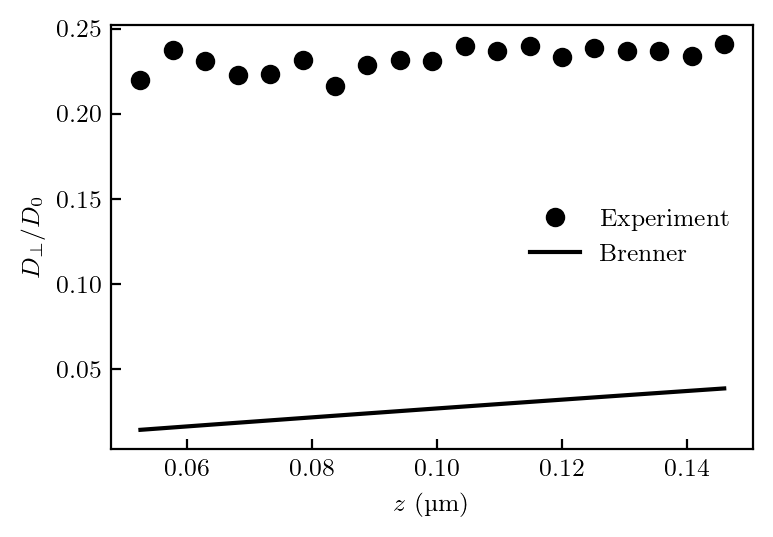

In [116]:
fig, ax1 = plt.subplots(1, 1, figsize=(10/2.54, 7/2.54))

i = 0

zz = zzs[i]
Dz = Dzs[i]
D0 = obs.D0s[i]
a = obs.aps[i]

z_dedrift = np.copy(obs.datas[i][:,2])
autocor_dz = z_dedrift[1:] - z_dedrift[:-1]
autocor_dz = autocor_dz - np.mean(autocor_dz)
# autocor_dz = z_dedrift - np.nanmean(z_dedrift)
sigma2_z = np.mean(autocor_dz[1:] * autocor_dz[:-1]) 
if sigma2_z < 0:
    sigma2_z = np.abs(sigma2_z)
    print("/!\ WARNING /!\ ")
    print("The Vestergaard error on the z-diffusion was negative!")
    print("The absolute value of this error was used instead")
    print()
err_z = np.sqrt(sigma2_z)
# err_Dz_z = 2 * sigma2_z / (2 * 5/6 * 1/obs.fps[i]) / D0
err_Dz_z = sigma2_z / (2 * 1/obs.fps[i]) / D0

print(err_Dz_z)


ax1.plot(
    zz * 1e6, Dz / D0 - err_Dz_z * 0, 
    ls='', marker='o', mfc=colors[i], 
    label='Experiment',
)
ax1.plot(
    zz * 1e6, Dz_z(zz, r=a), 
    ls='-', c='k', 
    label='Brenner',
)

ax1.legend(frameon=False)

ax1.set(
    xlabel='$z$ (µm)', 
    ylabel=r'$D_\perp / D_0$', 
    # xscale='log', 
    # yscale='log', 
)

plt.tight_layout()
plt.show()

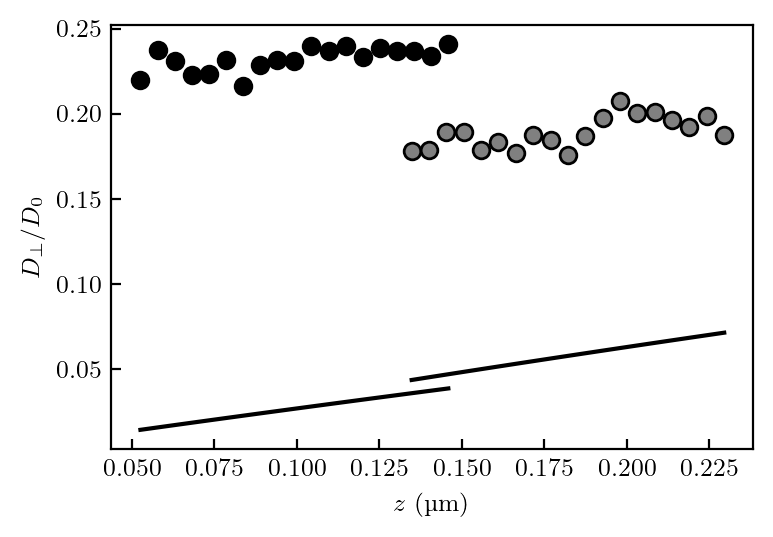

In [134]:
fig, ax1 = plt.subplots(1, 1, figsize=(10/2.54, 7/2.54))

for i in range(len(obs.D0s)):

    zz = zzs[i]
    Dz = Dzs[i]
    D0 = obs.D0s[i]
    a = obs.aps[i]

    ax1.plot(
        zz * 1e6, Dz / D0, 
        ls='', marker='o', mfc=colors[i], 
        label='Experiment',
    )
    ax1.plot(
        zz * 1e6, Dz_z(zz, r=a), 
        ls='-', c='k', 
        label='Brenner',
    )

# ax1.legend(frameon=False)

ax1.set(
    xlabel='$z$ (µm)', 
    ylabel=r'$D_\perp / D_0$', 
    # xscale='log', 
    # yscale='log', 
)

plt.tight_layout()
plt.show()

# Compare Experiments